# Computing entropy of files

## Introduction

In this application we treat a file like a sequence of **bytes** generated
by a Discrete Memoryless Source (DMS). 

We estimate the entropy of the file by computing the empirical frequency of each byte,
and then using the formula for the entropy of a DMS.

$$
H(X) = - \sum_{i=0}^{255} p_i \log_2(p_i)
$$

where $p_i$ is the frequency of the byte $i$ in the file.

## Walkthrough

We estimate the frequency of every byte by counting.

First, let's open a file and read its content, incrementing
a counter for each byte.
We're going to use the `read_bytes()` metod available in Pathlib package.

In [1]:
import pathlib

filename = "data/texten.txt"

# Prepare counters
counts = [0] * 256

for byte in pathlib.Path(filename).read_bytes():
    counts[byte] += 1

Now, let's print some statistics about the counters:

In [2]:

print(f"Total bytes = {sum(counts)}")

print(f"{'Code':>10} {'Char':>10} {'Count':>10}")
for i, count in enumerate(counts):
    if chr(i).isalpha():
        print(f"{i:>10d} {i:>10c} {count:>10d}")


Total bytes = 16793
      Code       Char      Count
        65          A        147
        66          B         88
        67          C         57
        68          D         63
        69          E        110
        70          F         29
        71          G         58
        72          H         45
        73          I        228
        74          J          3
        75          K          5
        76          L         54
        77          M         44
        78          N         59
        79          O        190
        80          P         19
        81          Q          0
        82          R        111
        83          S         70
        84          T        128
        85          U         12
        86          V         13
        87          W         48
        88          X          1
        89          Y         22
        90          Z          2
        97          a        697
        98          b        127
        99          c  

Let's print a histogram of the letter counters.

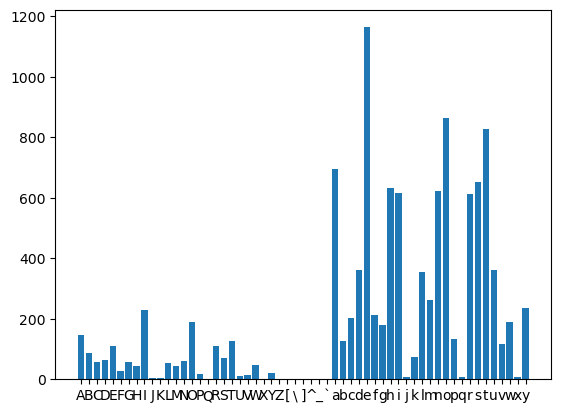

In [3]:
import matplotlib.pyplot as plt

chars_hist = [chr(i) for i in range(65, 122)]
count_hist = [counts[i] for i in range(65, 122)]

plt.bar(chars_hist, count_hist)
plt.show()


We obtain probabilities by dividing each counter to the total:

In [4]:
probs = [count / sum(counts) for count in counts]

print(f"{'Code':>10} {'Char':>10} {'Count':>10} {'Prob':>10}")
for i, (count, prob) in enumerate(zip(counts, probs)):
    if chr(i).isalpha():
        print(f"{i:>10d}{i:>10c}{count:>10d}{prob:>20.6f}")


      Code       Char      Count       Prob
        65         A       147            0.008754
        66         B        88            0.005240
        67         C        57            0.003394
        68         D        63            0.003752
        69         E       110            0.006550
        70         F        29            0.001727
        71         G        58            0.003454
        72         H        45            0.002680
        73         I       228            0.013577
        74         J         3            0.000179
        75         K         5            0.000298
        76         L        54            0.003216
        77         M        44            0.002620
        78         N        59            0.003513
        79         O       190            0.011314
        80         P        19            0.001131
        81         Q         0            0.000000
        82         R       111            0.006610
        83         S        70        

Finally, let's compute the entropy. We skip all frequencies equal to zero, since they don't contribute to the entropy.

In [5]:
from math import log2

entropy = sum([-p * log2(p) for p in probs if p > 0])
print(f"Entropy = {entropy:.2f} bits per byte")

Entropy = 4.59 bits per byte


## Function

We will encapsulate the code in a function, so that we can reuse it conveniently

In [6]:
def entropy_of_file(filename):
    counts = [0] * 256
    for byte in pathlib.Path(filename).read_bytes():
        counts[byte] += 1
    probs = [count / sum(counts) for count in counts]
    return sum([-p * log2(p) for p in probs if p > 0])

Now let's compute the entropy of various files:

In [17]:
entropy_of_file("data/texten.txt")

4.587764553430704

In [18]:
entropy_of_file("data/textro.txt")

4.628863509926092

In [19]:
entropy_of_file("data/Ceahlau.jpg")

7.96649855933222

In [20]:
entropy_of_file("data/ChromeSetup.exe")

7.898282999757679